## OpenDataSTL demo

This notebook is going to demo a visualization for citations in the St. Louis area. Specifically, I was wondering if there was any interesting patterns between the location of a citation and where the defendent lives.

### WARNING
The data used in this demo is not attested by any authority. The conclusions here must be taken with salt.

In [5]:
## MAGIC & IMPORTS
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

My two data sources are the dummy data files that Global Hack V teams received in mid-September. Two files were provided, `citations.csv` and `violations.csv`, and both are read into the program.

In [6]:
citations = pd.read_csv('GHV dummy data/citations.csv')
violations = pd.read_csv('GHV dummy data/violations.csv')

### Relation between defendant's residence and location of citation

One thing that I was wondering about with the problem of the municipal court system, is whether or not there is a link between where someone lives and where the citation is made. I have listed the `defendant_city` and the `court_location` below.

In [11]:
citations[['defendant_city','court_location']]

,defendant_city,court_location
0,DES PERES,COUNTRY CLUB HILLS
1,CHESTERFIELD,FLORISSANT
2,HILLSDALE,FENTON
3,HILLSDALE,ST. LOUIS CITY
4,HILLSDALE,WEBSTER GROVES
5,HAZELWOOD,NaN
6,HILLSDALE,BERKELEY 1
7,WARSON WOODS,RIVERVIEW
8,CRYSTAL LAKE PARK,WARSON WOODS
9,SUNSET HILLS,RICHMOND HEIGHTS


### Suppose they are mostly equal

If the system is fair, I will first expect a large percentage of the `defendant_city` to contain the same text as `court_location`. There are municipalities that do not have their own courts, so keep that in mind.

Number of matching cities:  11
Number of unmatching cities:  989


([<matplotlib.patches.Wedge at 0x7fb11fe685c0>,
  <matplotlib.text.Text at 0x7fb11fdef9b0>])

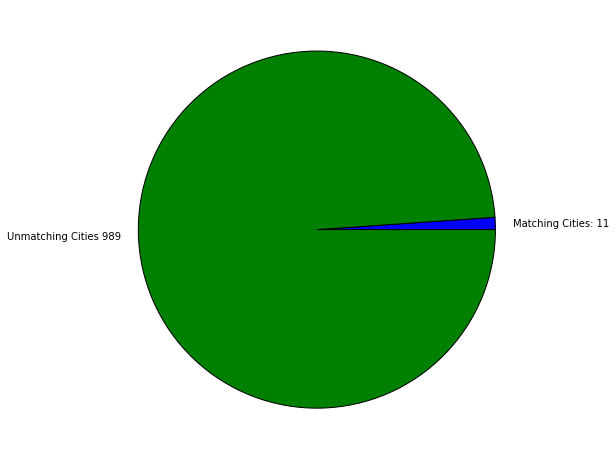

In [23]:
matching_cities = citations[citations['defendant_city'] == citations['court_location']]
print("Number of matching cities: ", len(matching_cities))

unmatching_cities = citations[citations['defendant_city'] != citations['court_location']]
print("Number of unmatching cities: ", len(unmatching_cities))

plt.figure(figsize=(8,8))
plt.pie([len(matching_cities), len(unmatching_cities)], labels=["Matching Cities: " + str(len(matching_cities)), 
                                                                "Unmatching Cities " + str(len(unmatching_cities))])

### Suppose that my intuition is way off, or that I don't know what I'm doing

I was actually suprised by this result. Was there really only 11 records where the locations matched?

This could be the result of how the dummy data was generated or sourced. However, this entire demo is based around the assumption that this data is a representation of real data, so that doesn't raise any interesting questions.

So, what else is wrong could be causing this result? I have not done any processing at all on the data that I'm looking at, so it could be that the values in the two columns that I'm interested in don't align. 

Let's check that.

In [45]:
defendant_cities = [defendant for defendant in citations['defendant_city'].astype("category").cat.categories]
court_cities = [court for court in citations['court_location'].astype("category").cat.categories]
print("Defendant cities: ", len(defendant_cities))
print("Court Cities", len(court_cities))

unmatched_court_cities = [city for city in court_cities if city not in defendant_cities]
unmatched_defendant_cities = [city for city in defendant_cities if city not in court_cities]
print("Cities that are in court_location but not in defendant_city: \n", unmatched_court_cities, "\n")
print("Cities that are in defandent_city but not in court_location: \n", unmatched_defendant_cities, "\n")

Defendant cities:  91
Court Cities 85
Cities that are in court_location but not in defendant_city: 
 ['BERKELEY 1', 'BERKELEY 2', 'ST. JOHN', 'TOWN AND COUNTRY', 'UNINCORPORATED CENTRAL ST. LOUIS COUNTY', 'UNINCORPORATED NORTH ST. LOUIS COUNTY', 'UNINCORPORATED SOUTH ST. LOUIS COUNTY', 'UNINCORPORATED WEST ST. LOUIS COUNTY'] 

Cities that are in defandent_city but not in court_location: 
 ['BELLERIVE', 'BERKELEY', 'CHAMP', 'COUNTRY LIFE ACRES', 'CRYSTAL LAKE PARK', 'GLEN ECHO PARK', 'GREEN PARK', 'HUNTLEIGH', 'NORWOOD COURT', 'ST. GEORGE', 'TOWN & COUNTRY', 'TWIN OAKS', 'WESTWOOD', 'WILBUR PARK'] 



Well, this is interesting. There are two `BERKELEY` court locations that are marked differently, and then there is the slight difference between `TOWN AND COUNTRY` and `TOWN & COUNTRY`. 

However, the biggest discrepancy here is that the `UNINCORPORATED` records in the court locations. Clearly, these areas have names that the locals use, but the county bundles them together. 

In [58]:
court_location_value_counts = citations['court_location'].astype("category").value_counts()
print("Number of citations in unmatched court locations: ", court_location_value_counts[unmatched_court_cities].sum())
print("Breakdown by location:\n")
print(court_location_value_counts[unmatched_court_cities])

Number of citations in unmatched court locations:  80
Breakdown by location:

BERKELEY 1                                 14
BERKELEY 2                                 10
ST. JOHN                                    5
TOWN AND COUNTRY                           13
UNINCORPORATED CENTRAL ST. LOUIS COUNTY    11
UNINCORPORATED NORTH ST. LOUIS COUNTY      12
UNINCORPORATED SOUTH ST. LOUIS COUNTY       7
UNINCORPORATED WEST ST. LOUIS COUNTY        8
dtype: int64


In [59]:
defendant_city_value_counts = citations['defendant_city'].astype("category").value_counts()
print("Number of citations in unmatched defendant cities: ", defendant_city_value_counts[unmatched_defendant_cities].sum())
print("Breakdown by location:\n")
print(defendant_city_value_counts[unmatched_defendant_cities])

Number of citations in unmatched defendant cities:  144
Breakdown by location:

BELLERIVE              5
BERKELEY               8
CHAMP                 10
COUNTRY LIFE ACRES     8
CRYSTAL LAKE PARK     21
GLEN ECHO PARK         5
GREEN PARK            15
HUNTLEIGH              1
NORWOOD COURT          8
ST. GEORGE             7
TOWN & COUNTRY         4
TWIN OAKS             11
WESTWOOD              15
WILBUR PARK           26
dtype: int64


### Inconclusive conclusions
Take a look at Town and Country's data. It says in our data that people who have a home address in Town and Country were cited 4 times for traffic violations. However, there were 12 citations issued from that same police department. 

The total citations issued in the two Berkeleys is 24, and the number of citations to Berkeley home addresses is 8. 

I cannot draw true conclusions from either of these observations, since I don't know how to figure out if something is statistically significant (yet). 